In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 


In [2]:
#Read the new excel file, this contains the individual answers.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/EmployeeData_May_2018_Results.xlsx'
data1 = pd.read_excel(current_path + file, sheet_name = 1)

In [3]:
data1.head()

,RespondentId,1,2,3,4,5,6,7,8,9,...,Location Code,Managerial Level,Marital Status,Meaningful Innovation Opportunities,Pay Type (Hourly/Salaried),Race/ Ethnicity,Responsibility,Tenure-GPTW,Tenure-SeniorCare,Zip within the area
0,182227,4,5,5,4,4,5,5,3,5,...,1075,Employee/Individual Contributor,Married,A lot,Hourly,Caucasian or White,Neither children nor elders,Less than 2 years,6 months to 9 months,32789
1,182658,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Married,A lot,Salaried,Caucasian or White,Children,Less than 2 years,3 months to 6 months,80107
2,182740,5,5,5,4,4,5,4,5,5,...,5504,Employee/Individual Contributor,Single,A lot,Hourly,Caucasian or White,Both children and elders,Less than 2 years,9 months to 1 year,80107
3,182750,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Not Indicated,A lot,Hourly,Caucasian or White,Both children and elders,Over 20 years,Over 20 years,80107
4,182755,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Single,A lot,Hourly,Caucasian or White,Elders,Less than 2 years,1 year to 2 years,80107


In [5]:
data1.rename(columns = {'Location Code':'LocationCode'}, inplace = True) 

,RespondentId,1,2,3,4,5,6,7,8,9,...,LocationCode,Managerial Level,Marital Status,Meaningful Innovation Opportunities,Pay Type (Hourly/Salaried),Race/ Ethnicity,Responsibility,Tenure-GPTW,Tenure-SeniorCare,Zip within the area
0,182227,4,5,5,4,4,5,5,3,5,...,1075,Employee/Individual Contributor,Married,A lot,Hourly,Caucasian or White,Neither children nor elders,Less than 2 years,6 months to 9 months,32789
1,182658,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Married,A lot,Salaried,Caucasian or White,Children,Less than 2 years,3 months to 6 months,80107
2,182740,5,5,5,4,4,5,4,5,5,...,5504,Employee/Individual Contributor,Single,A lot,Hourly,Caucasian or White,Both children and elders,Less than 2 years,9 months to 1 year,80107
3,182750,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Not Indicated,A lot,Hourly,Caucasian or White,Both children and elders,Over 20 years,Over 20 years,80107
4,182755,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Single,A lot,Hourly,Caucasian or White,Elders,Less than 2 years,1 year to 2 years,80107


In [9]:
TestLocationCodes=data1.LocationCode.unique()
TestLocationCodes

array([1075, 5504, 5573, 5563, 5581, 5718, 5676, 5529, 5643, 5077, 5513,
       5648, 5493, 6401, 5669, 5655, 5678, 5705, 5671, 5717, 5709, 5620,
       5417, 5199, 5704, 5586, 5520, 5126, 5482, 5484, 5310, 5530, 5710,
       5711, 5553, 5280, 5024, 5477, 5683, 1076, 5501, 5514, 5906, 5056,
       5269, 5680, 5708, 6501, 5537, 5907, 5331, 5475, 5623, 5370, 5649,
       5568, 5646, 5702, 5677, 5582, 5657, 5541, 5476, 5534, 5522, 5703,
       5682, 5495, 5712, 5714, 5200, 5602, 5721, 5137, 5065, 5078, 5015,
       5301, 5606, 5524, 5713, 5516, 5681, 5550, 5658, 5560, 5478, 5546,
       5640, 5625, 5517, 5715, 5240, 5532, 5660, 5719, 5437, 5318, 5565,
       5174, 5580, 5494, 5512, 5481, 5644, 5564, 5091, 5515, 5359, 5675,
       5518, 5503, 5492, 5562, 5663, 5574, 5567, 5570, 5543, 5168, 5109,
       5549, 5361, 5020, 5673, 5674, 5647, 5684, 5372, 5311, 5585, 5716,
       5665, 5587, 5521, 5052, 5542, 5653, 5048, 5556, 5706, 5540, 5085,
       5486, 5575, 5265, 5306, 5666, 5409, 5377, 54

In [11]:
#get the data for the specified location
TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[0]]
#Get only the Answers
TestLocationAnswers=TestLocationData.iloc[:,1:61]
TestLocationAnswers.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,4,5,5,4,4,5,5,3,5,4,...,5,5,5,5,5,4,5,5,5,5
27,5,5,2,4,4,3,3,5,4,2,...,4,4,4,4,4,4,4,2,3,4
64,2,4,2,2,3,2,2,2,3,3,...,2,3,2,2,3,2,4,2,2,2
87,4,5,4,4,4,3,3,3,4,4,...,4,4,3,3,4,3,4,4,3,4
89,5,5,4,4,5,4,5,5,5,5,...,5,5,5,4,5,4,5,5,5,5


In [12]:
data1['LocationCode'].nunique()

266

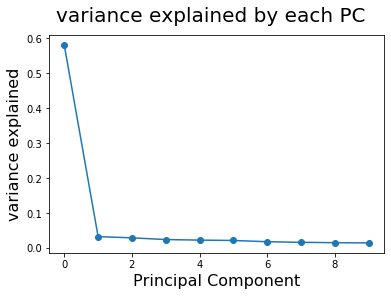

In [13]:
#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 10 components for now because we know this should be enough for this dataset
pcaL=PCA(n_components=10)
pcaL.fit(TestLocationAnswers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaL.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCAL=pcaL.transform(TestLocationAnswers)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.


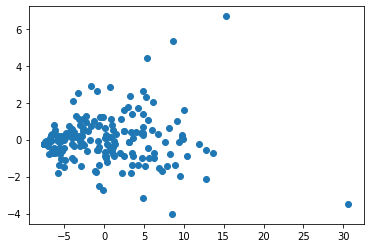

In [14]:
plt.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,2])
plt.show()

In [15]:
DataArrayPCAL.shape

(189, 10)

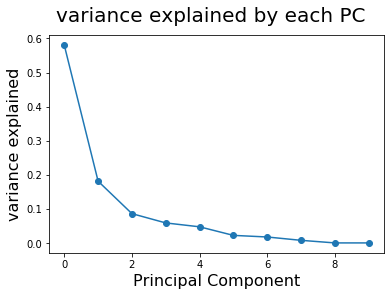

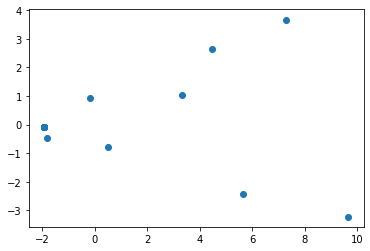

In [16]:
#Run for another location.

#get the data for the specified location
TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[1]]
#Get only the Answers
TestLocationAnswers=TestLocationData.iloc[:,1:61]

#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 10 components for now because we know this should be enough for this dataset
pcaL=PCA(n_components=10)
pcaL.fit(TestLocationAnswers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaL.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCAL=pcaL.transform(TestLocationAnswers)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.
plt.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,2])
plt.show()

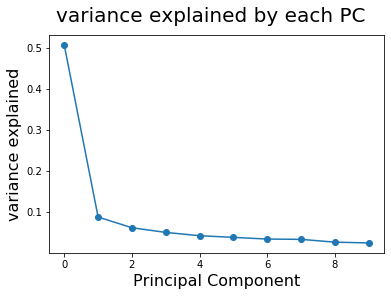

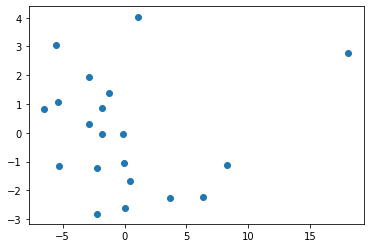

In [17]:
#Another location

#get the data for the specified location
TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[2]]
#Get only the Answers
TestLocationAnswers=TestLocationData.iloc[:,1:61]

#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 10 components for now because we know this should be enough for this dataset
pcaL=PCA(n_components=10)
pcaL.fit(TestLocationAnswers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaL.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCAL=pcaL.transform(TestLocationAnswers)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.
plt.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,2])
plt.show()